<a href="https://colab.research.google.com/github/Aoisama11/Aoisama11/blob/main/Population_distribution_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install pandas matplotlib openpyxl

Welcome to the World Bank population dataset visualizer!
Please upload the main dataset.


Saving API_SP.POP.TOTL_DS2_en_excel_v2_26429.xls to API_SP.POP.TOTL_DS2_en_excel_v2_26429 (8).xls
Please upload the male population dataset.


Saving API_SP.POP.TOTL.MA.IN_DS2_en_excel_v2_17457.xls to API_SP.POP.TOTL.MA.IN_DS2_en_excel_v2_17457.xls
Please upload the female population dataset.


Saving API_SP.POP.TOTL.FE.IN_DS2_en_excel_v2_17463.xls to API_SP.POP.TOTL.FE.IN_DS2_en_excel_v2_17463 (1).xls


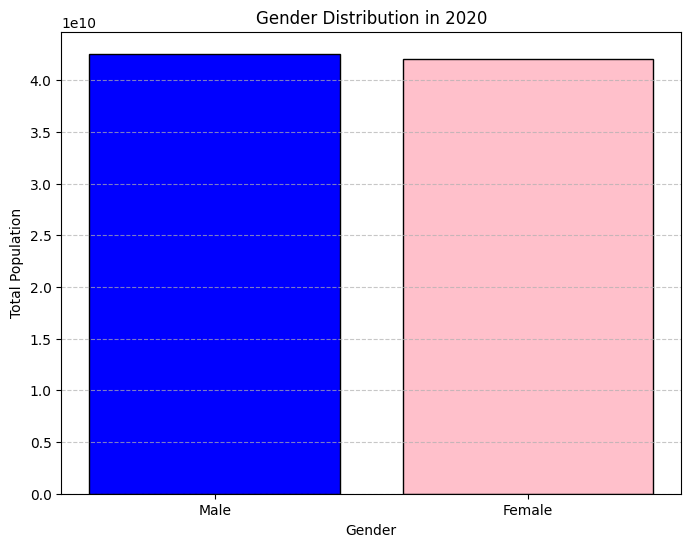

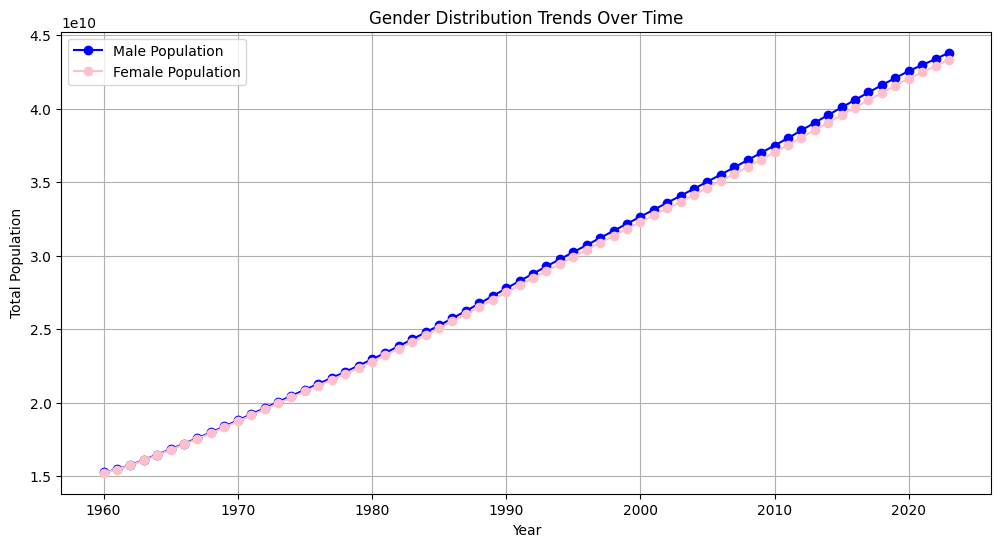

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

def upload_files():
    """
    Prompt the user to upload multiple Excel files in Google Colab.
    Returns:
        dict: Dictionary containing paths to uploaded files.
    """
    print("Please upload the main dataset.")
    main_file = files.upload()
    print("Please upload the male population dataset.")
    male_file = files.upload()
    print("Please upload the female population dataset.")
    female_file = files.upload()

    return {
        "main": list(main_file.keys())[0],
        "male": list(male_file.keys())[0],
        "female": list(female_file.keys())[0]
    }

def preprocess_datasets(main_file, male_file, female_file):
    """
    Preprocess the main, male, and female datasets and merge them.
    Args:
        main_file (str): Path to the main dataset.
        male_file (str): Path to the male population dataset.
        female_file (str): Path to the female population dataset.
    Returns:
        pd.DataFrame: The merged dataset with male and female populations.
    """
    # Load datasets
    main_data = pd.read_excel(main_file)
    male_data = pd.read_excel(male_file)
    female_data = pd.read_excel(female_file)

    # Rename columns for clarity
    main_data.columns = main_data.iloc[2]  # Use the third row as column headers
    male_data.columns = male_data.iloc[2]
    female_data.columns = female_data.iloc[2]

    # Skip the first three rows
    main_data = main_data[3:].reset_index(drop=True)
    male_data = male_data[3:].reset_index(drop=True)
    female_data = female_data[3:].reset_index(drop=True)

    # Reshape datasets: Convert year columns into rows
    main_data = main_data.melt(id_vars=["Country Name", "Indicator Name"],
                               var_name="Year", value_name="Population")
    male_data = male_data.melt(id_vars=["Country Name", "Indicator Name"],
                               var_name="Year", value_name="Male Population")
    female_data = female_data.melt(id_vars=["Country Name", "Indicator Name"],
                                   var_name="Year", value_name="Female Population")

    # Convert Year and Population columns to numeric
    main_data["Year"] = pd.to_numeric(main_data["Year"], errors="coerce")
    male_data["Year"] = pd.to_numeric(male_data["Year"], errors="coerce")
    female_data["Year"] = pd.to_numeric(female_data["Year"], errors="coerce")

    main_data["Population"] = pd.to_numeric(main_data["Population"], errors="coerce")
    male_data["Male Population"] = pd.to_numeric(male_data["Male Population"], errors="coerce")
    female_data["Female Population"] = pd.to_numeric(female_data["Female Population"], errors="coerce")

    # Merge datasets
    merged_data = pd.merge(main_data, male_data, on=["Country Name", "Year"], how="inner")
    merged_data = pd.merge(merged_data, female_data, on=["Country Name", "Year"], how="inner")

    # Drop rows with missing values
    merged_data = merged_data.dropna()

    return merged_data

def visualize_gender_distribution_for_year(data, year=2020):
    """
    Visualize the gender distribution (male vs. female) for a specific year.
    Args:
        data (pd.DataFrame): The processed dataset.
        year (int): The year to analyze.
    """
    # Filter data for the specific year
    year_data = data[data["Year"] == year]

    # Aggregate male and female populations
    male_population = year_data["Male Population"].sum()
    female_population = year_data["Female Population"].sum()

    # Plot a bar chart
    plt.figure(figsize=(8, 6))
    plt.bar(["Male", "Female"], [male_population, female_population], color=["blue", "pink"], edgecolor="black")
    plt.title(f"Gender Distribution in {year}")
    plt.xlabel("Gender")
    plt.ylabel("Total Population")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

def visualize_gender_trends_over_time(data):
    """
    Visualize gender distribution trends (male vs. female) over time.
    Args:
        data (pd.DataFrame): The processed dataset.
    """
    # Aggregate male and female populations by year
    male_data = data.groupby("Year")["Male Population"].sum()
    female_data = data.groupby("Year")["Female Population"].sum()

    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(male_data.index, male_data.values, marker="o", label="Male Population", color="blue")
    plt.plot(female_data.index, female_data.values, marker="o", label="Female Population", color="pink")
    plt.title("Gender Distribution Trends Over Time")
    plt.xlabel("Year")
    plt.ylabel("Total Population")
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    """
    Main function to run the program in Google Colab.
    """
    print("Welcome to the World Bank population dataset visualizer!")

    # Prompt the user to upload files
    files = upload_files()

    # Preprocess the datasets
    try:
        processed_data = preprocess_datasets(files["main"], files["male"], files["female"])
    except Exception as e:
        print(f"Error preprocessing data: {e}")
        return

    # Visualizations
    visualize_gender_distribution_for_year(processed_data, year=2020)  # Gender distribution for a specific year
    visualize_gender_trends_over_time(processed_data)  # Gender distribution trends over time

if __name__ == "__main__":
    main()